# Doodle Prediction


### Necessary Imports for the project

In [222]:
%matplotlib inline
import os
from flask import Flask, request, jsonify

import keras
from keras.preprocessing import image
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image



# Dependencies to Visualize the model
from IPython.display import Image, SVG
from PIL import Image

np.random.seed(0)


import tensorflow as tf
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Flatten, Conv2D,MaxPooling2D
from keras.datasets import mnist



### Load the data

In [225]:
# Load the numpy array file

def Loaddata():
    
    qddataset = np.empty(shape=(0,784))
    labels = np.empty(shape=(0))
            
    quickdrawnames = ["airplane","apple","butterfly","coffee cup","flower", "map","pineapple", 
                      "rainbow","snowman", "traffic light"]
    count = 0
    
    for name in quickdrawnames: 
        filename = f"./data/full_numpy_bitmap_{name}.npy"

# Load the file
        X = np.load(filename)   
        
 # Display the sample image    
        img_size=28
        plt.imshow(X[10].reshape(img_size, img_size))
        
#        Collecting the Imagedataset 
        qddataset = np.concatenate((qddataset, X))
        
#      Setting the labels as the integers

 # creating a list of labels as the same size of features
        y=[count]*X.shape[0]
        y = np.array(y) # converting the list to a numpy array
        labels =np.concatenate((labels, y))
        count+=1   # increasing the count for next label.
            
    return qddataset , labels

    

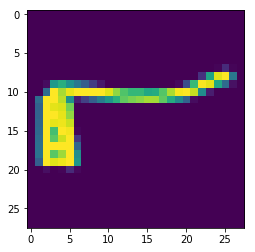

In [226]:
qddataset, labels = Loaddata()

In [227]:
labels.shape

(1580489,)

In [228]:
qddataset.shape

(1580489, 784)

## Splitting the dataset and labels 80-20 percent


In [229]:

X_train,X_test, y_train, y_test = train_test_split(qddataset, labels, test_size=0.2, random_state=42)

In [230]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  79.,  21.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   1., 239., 156.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 156., 230.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 139., 238.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [231]:
y_train.shape

(1264391,)

In [232]:
X_train.shape

(1264391, 784)

In [233]:
X_test.shape

(316098, 784)

In [234]:
y_test.shape

(316098,)

## Scaling and Normalization

In [235]:
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [236]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.37264151, 0.10294118, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00392157, 0.9372549 , 0.61176471,
       0.        , 0.        , 0.        , 0.        , 0.     

In [237]:
y_train[:20]

array([3., 1., 3., 7., 0., 8., 0., 9., 9., 3., 0., 5., 4., 8., 9., 9., 6.,
       9., 4., 8.])

## One-Hot Encoding

In [238]:
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

y_train[0]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [239]:
y_train[:20]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

##  Split the 784 as 28x28 pixels 

In [240]:
# CNN Conv2D - expects a 4D array - batchsize is added default -(batchsize, rows, columns, channel) -- > 28 rows x 28 columns x1(grayscale)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [241]:
X_train.shape

(1264391, 28, 28, 1)

In [242]:
X_test.shape

(316098, 28, 28, 1)

# Create the CNN model

In [243]:
num_classes =10
model=Sequential() # Sequential model

In [244]:
model.add(Conv2D(32,(3, 3),activation="relu", input_shape=(28,28,1) ))
model.add(MaxPooling2D(pool_size=(2, 2),padding="same", strides=(1, 1)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2),padding="same", strides=(1, 1)))
model.add(Flatten())


In [245]:
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))

In [246]:
model.add(Dense(num_classes, activation='softmax'))

In [247]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [248]:
model.fit(X_train,y_train)

Epoch 1/1
1264391/1264391 [==============================] - 5876s 5ms/step - loss: 0.1367 - acc: 0.9591


## Save the model

In [249]:
model.save("Quickdraw.h5")

## Evaluate the model

In [250]:
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.1137552775011944, Accuracy: 0.9671146290074597
